In [100]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os
import csv


In [101]:
# define variables, lists
# years of data for analysis
year_list = ['2015', '2016', '2017', '2018', '2019', '2022']

# project happiness survey categories
test_criteria = ['Happiness Overall', 'Family', 'Health', 'Freedom', 'Corruption', 'Generosity']

In [102]:
# Load csv files containing the data from the Happiness Surveys for the years 2015 through 2019 and 2022
clean_data_df = pd.read_csv('Output_data/merged_df.csv')

clean_data_df

,Country,Country.1,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.572,0.343,0.263,6,7.480,1.526,1.052,0.572,0.343,0.263
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.591,0.118,0.354,4,7.494,1.624,1.026,0.591,0.118,0.354
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.592,0.410,0.252,2,7.600,1.573,0.996,0.592,0.410,0.252
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.603,0.341,0.271,3,7.554,1.582,1.028,0.603,0.341,0.271
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.584,0.308,0.285,9,7.278,1.505,1.039,0.584,0.308,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135,Rwanda,154.0,3.465,0.77370,0.42864,0.59201,0.55191,0.22628,152.0,...,0.555,0.411,0.217,152,3.334,0.711,0.614,0.555,0.411,0.217
136,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.349,0.082,0.175,102,4.883,0.437,0.397,0.349,0.082,0.175
137,137,Syria,156.0,3.006,0.47489,0.72193,0.15684,0.18906,0.47179,156.0,...,0.013,0.141,0.331,149,3.462,0.378,0.440,0.013,0.141,0.331
138,138,Burundi,157.0,2.905,0.41587,0.22396,0.11850,0.10062,0.19727,157.0,...,0.220,0.180,0.176,145,3.775,0.447,0.380,0.220,0.180,0.176


In [103]:
# Select country for column, append data later
country_data_df = pd.DataFrame(clean_data_df[['Country.1']])

# rename the country column to make it easy on the eyes
country_data_df = country_data_df.rename(columns={'Country.1':'Country'})
country_data_df

,Country
0,Switzerland
1,Iceland
2,Denmark
3,Norway
4,Canada
...,...
135,Rwanda
136,Benin
137,Syria
138,Burundi


In [104]:
# Select country and corresponsing Health columns for the years
health_data_df = pd.DataFrame(clean_data_df[['Country.1',
                                            'Health (2015)',
                                            'Health (2016)',
                                            'Health (2017)',
                                            'Health (2018)',
                                            'Health (2019)',
                                            'Health (2022)',
                                             ]])

# rename the country column to make it easy on the eyes
health_data_df = health_data_df.rename(columns={'Country.1':'Country'})
# display only the columns pertaining to health
health_data_df

,Country,Health (2015),Health (2016),Health (2017),Health (2018),Health (2019),Health (2022)
0,Switzerland,0.94143,0.86303,0.858131,0.927,1.052,1.052
1,Iceland,0.94784,0.86733,0.833552,0.914,1.026,1.026
2,Denmark,0.87464,0.79504,0.792566,0.868,0.996,0.996
3,Norway,0.88521,0.79579,0.796667,0.861,1.028,1.028
4,Canada,0.90563,0.82760,0.834558,0.896,1.039,1.039
...,...,...,...,...,...,...,...
135,Rwanda,0.42864,0.31865,0.326425,0.400,0.614,0.614
136,Benin,0.31910,0.21028,0.209930,0.240,0.397,0.397
137,Syria,0.72193,0.62994,0.500533,0.539,0.440,0.440
138,Burundi,0.22396,0.15747,0.151611,0.145,0.380,0.380


In [7]:
# Move through DataFrames to create for aggregate


#for yr in year_list:
#yr_health = "'" + 'Health' + ' ' + '(' + str(2015) + ')' + '"'

    
    #country_yr_score = health_data_df.loc[['Country', {yr_health}]]
  #  country_yr_score['Year'] = yr
  ##  country_yr_score.loc['Year'] = yr

#country_year_score


# df['Address'] = address
# # rename the country column to make it easy on the eyes
# country_data_df = country_data_df.rename(columns={'Country.1':'Country'})
# country_data_df

In [127]:
# loop through new DataFrames to make a bar graph of Health Happiness Scores
test_criteria = 'Health'

#i = 0 # start with the first year in the list
#for yr in year_list:
    
    # define loop variables
test_year = year_list[0]
        ## create the column for testing
col = f'{test_criteria} ({test_year})'
        ## create the DataFrame for testing
score_df = f'{test_criteria}{test_year}_df'

score_df = pd.DataFrame(health_data_df, columns = ['Country',f'{col}'])
score_df

,Country,Health (2015)
0,Switzerland,0.94143
1,Iceland,0.94784
2,Denmark,0.87464
3,Norway,0.88521
4,Canada,0.90563
...,...,...
135,Rwanda,0.42864
136,Benin,0.31910
137,Syria,0.72193
138,Burundi,0.22396


In [125]:
test_criteria = ['Health'

i += 1 # start with the first year in the list
#for yr in year_list:
    # define loop variables
test_year = (year_list[i])
title= (f'Health Happiness Scores for {test_year}')
#i +=1
title

'Health Happiness Scores for 2016'

<IPython.core.display.Javascript object>


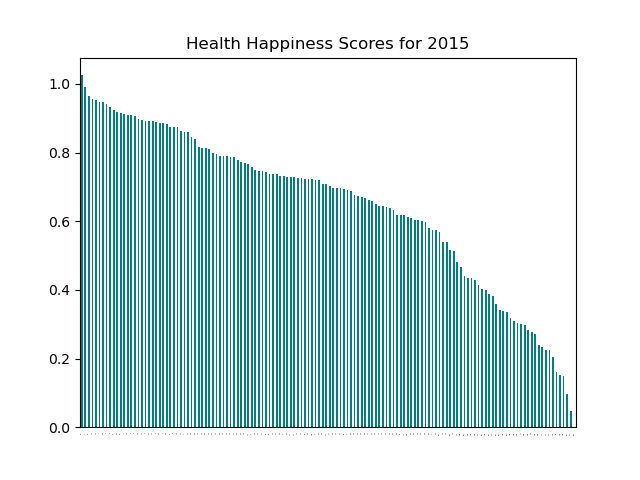

<IPython.core.display.Javascript object>


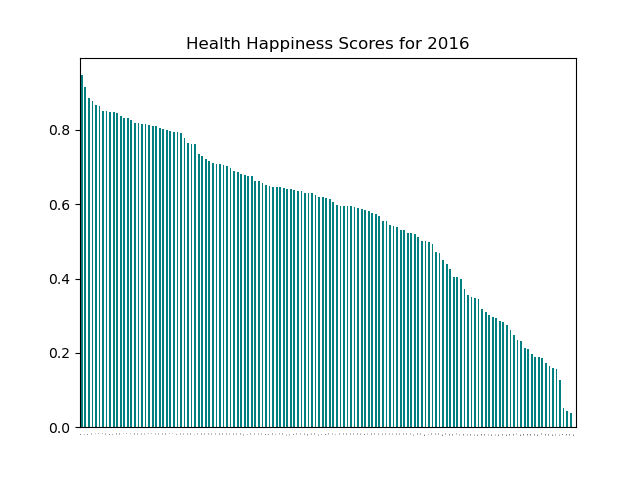

<IPython.core.display.Javascript object>


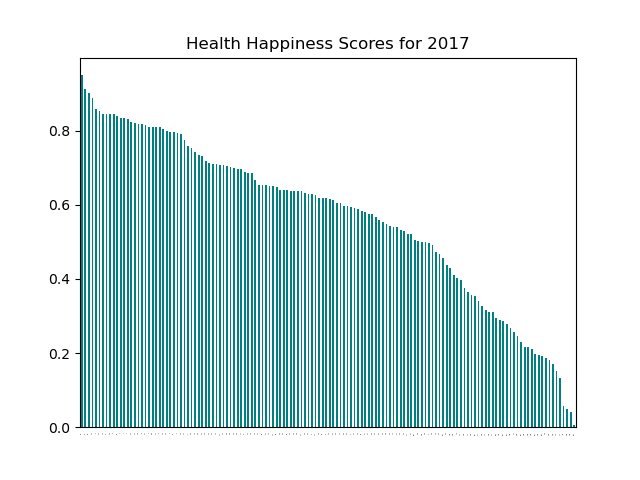

<IPython.core.display.Javascript object>


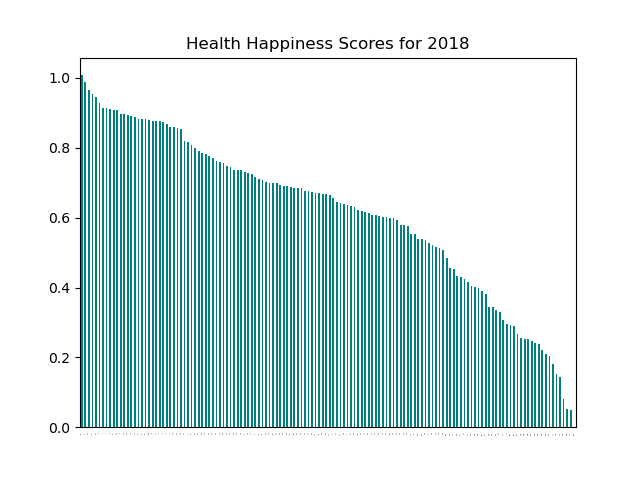

<IPython.core.display.Javascript object>


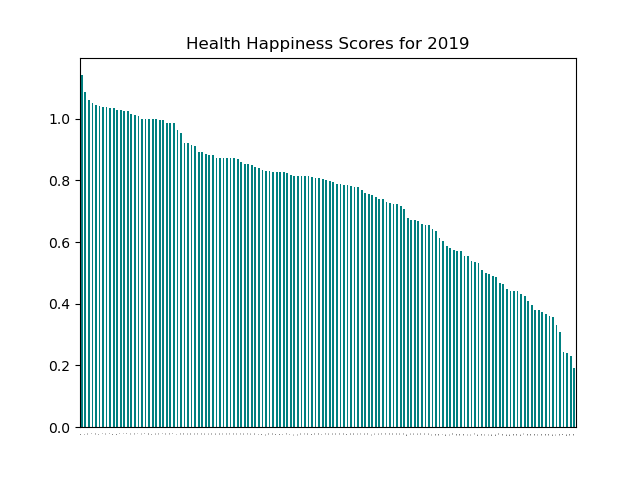

<IPython.core.display.Javascript object>


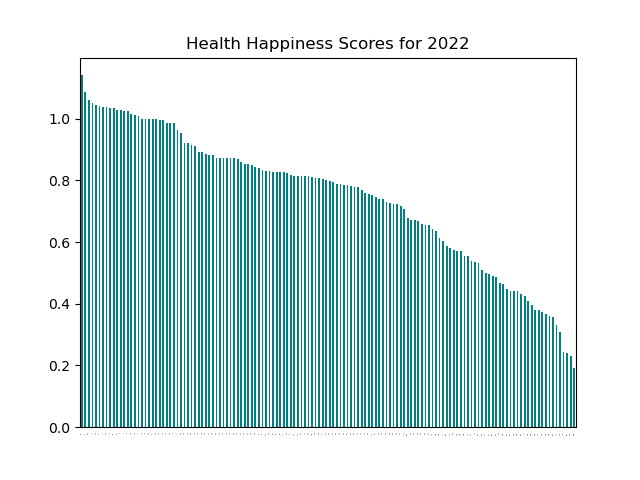

In [126]:
# loop through new DataFrames to make a bar graph of Health Happiness Scores
test_criteria = ['Happiness Overall', 'Family', 'Health', 'Freedom', 'Corruption', 'Generosity']

c = 0  # which criteria the information draws
i = 0  # location criteria test number for y values

# loop for all criteria if desired
for criteria in test_criteria
    # restart criteria for the next year
    i = 0
for yr in year_list:

    # define loop variables
    test_year = year_list[i]
        ## create the column for testing
    col = f'{test_criteria} ({test_year})'
        ## create the DataFrame for testing
    score_df = f'{test_criteria}{test_year}_df'

    health_data_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
    score_df = pd.DataFrame(health_data_df_sorted, columns = ['Country',f'{col}'])


    score_df.plot(kind='bar',
                         color='teal',
                         legend=None,
                         title= (f'Health Happiness Scores for {test_year}')
                         )
    # simply analyzing the shape of the graph
    plt.tick_params(axis='x', labelsize=0, length = 0)

    #plt.savefig("Images/Figure1.png")
    plt.show()

    # and create chart for the next year
    i += 1
    
# next criteria to create charts if desired
c +=1

In [10]:
# create a bar chart comparing the health score per country by year


for country in health_data_df:
    
    
health_data_df.plot(kind='bar',
                    color='teal',
                    legend=None,
                    title=, )






plt.xlabel(f'{bar_xlabels}')
plt.ylabel(f'{bar_ylabels}')
plt.xticks(rotation=45, horizontalalignment='center')
plt.tight_layout()
plt.savefig("Images/Figure1.png")
plt.show()

IndentationError: expected an indented block (2739610505.py, line 7)

In [ ]:
 # Select country and corresponsing Happiness Scores columns for the years
happy_data_df = pd.DataFrame(clean_data_df[['Country.1',
                                            'Happiness Score (2015)',
                                            'Happiness Score (2016)',
                                            'Happiness Score (2017)',
                                            'Happiness Score (2018)',
                                            'Happiness Score (2019)',
                                            'Happiness Score (2022)'
                                            ]])
# rename the country column to make it easy on the eyes
happy_data_df = happy_data_df.rename(columns={'Country.1':'Country'})
# display only the columns pertaining to health
happy_data_df

In [ ]:
# create DataFrame with columns for aggregate purposes (country, year, score)
for country in 
score_by_year_df = happy_data_df 

In [ ]:

health_data_df.plot(kind='bar', color='teal', legend=None, title=bar_title, )
plt.xlabel(f'{bar_xlabels}')
plt.ylabel(f'{bar_ylabels}')
plt.xticks(rotation=45, horizontalalignment='center')
plt.tight_layout()
plt.savefig("Images/Figure1.png")
plt.show()